# Center, standardize and normalize variables

To center, standardize or normalize variables are three different recodings that can be done to help compare variables, especially in regression analysis.

**Center:** Make the variable have a mean of 0.<br>
**Standardize:** Make the variable have a mean of zaero, and a standard deviation of 1.<br>
**Normalize:** Make the variables minimum value be 0, and the highest value 1.<br>

In none of the cases are the variables changed in any important way: the rank ordering of the observations will be the same, as well as the relative distances. Only the scales of the variables are affected.

There can be different reasons for wanting to do these recodings. If we use normal variables in a regression analysis, the b-coefficient shows the effect of an increase of the independent variable with 1, in the scale of the specific variable - one dollar, one year, one centimeter, and so on. With standardized variables, the coefficients instead show the effect of an increase of one standard deviation - a "typical" increase. If we instead use the normalized variable the coefficient shows the effect of going from the lowest value to the highest value.

There are some commands that are especially made for these recodings, for instance the command `center`. We can install it by typing `ssc install center`. But in this guide we will talk about how to do the recodings "by hand". It is not hard! We will start by loading the QoG dataset, where we will look at the variable for average life expectancy, `wdi_lifexp`. We start by looking at a histogram for the variable, with `histogram wdi_lifexp`.


(Quality of Government Basic dataset 2018 - Cross-Section)

(bin=13, start=50.591049, width=2.5382121)


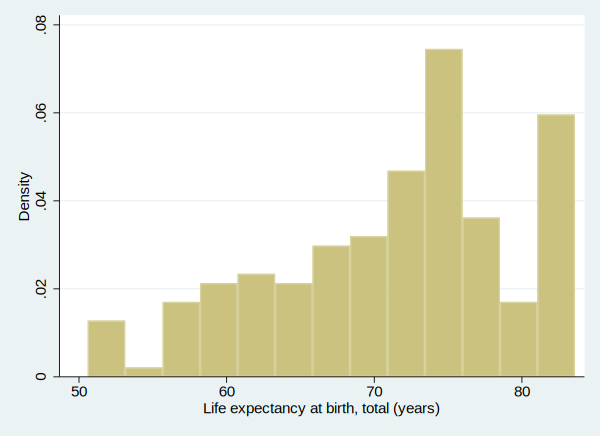

In [2]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_cs_jan18.dta", clear
histogram wdi_lifexp

The graph shows that the lowest value is just above 50, and the highest somewhat over 80. Now we will try to transform the variable in the three different ways.

## Center
The easiest transformation is to center the variable. The result will be a variable that shows how much life expectancy deviates frmo the global mean. We do so by subtracting the mean from the original variable. But first we need to know the mean, which we get with the command `sum`:

In [3]:
sum wdi_lifexp


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  wdi_lifexp |        185    71.25413    8.138066   50.59105   83.58781


The mean value is 71.25413. Now we can make a new variable with the command `generate` (abbreviated `gen`). The new variable will be the original variable minus 71.25413. We will call the new variable the same thing as the old variable, but with the prefix "center" for clarity.

In [4]:
gen center_wdi_lifexp = wdi_lifexp - 71.25413

(9 missing values generated)


If we now look a the mean of the new variable we can see that it is almost exactly zero - but not quite because of the rounding error in the mean. 2.73e-07 means that the it is 2.73 with the decimal sign seven steps to the left, that is, 0.000000273).

In [5]:
sum wdi_lifexp center_wdi_lifexp


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  wdi_lifexp |        185    71.25413    8.138066   50.59105   83.58781
center_wdi~p |        185    2.73e-07    8.138066  -20.66308   12.33368


And the variable is done! Note that the standard deviation is exactly the same in the new and old variable. THe minimum and maximum values have been shifted, but the distance between them is the same as before. The only thing we have done is to shift the scale to the left.

## Standardize
A standardized variable has a mean of 0, and a standard deviation (a measure of the spread) of 1. We do so by doing two things. First we subtract the mean to center the variable, and then we divide by the standard deviation. In this way the standard deviation will be 1.

Vi saw above with `sum wdi_lifexp` that the mean was 71.25413 and the standard deviation was 8.138066. Now we can create the standardize variable with one command, using parentheses. First the calculation in the parantheses will be performed, and then calculations outside the parentheses. First we subtract the mean, and then we divide with the standard deviation.

In [7]:
gen std_wdi_lifexp = (wdi_lifexp-71.25413)/8.138066

(9 missing values generated)


If we now look at the new variable we can see that the mean is (very close to) zero, but the standard deviation is now zero. The min and max values have also changed:

In [8]:
sum std_wdi_lifexp


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
std_wdi_li~p |        185    3.83e-08           1  -2.539065   1.515554


But again, it is only the scale that has changed. If we look at a histogram of the new variable we can see that the shape of the distribution is the same as in the original histogram.

(bin=13, start=-2.5390654, width=.31189378)


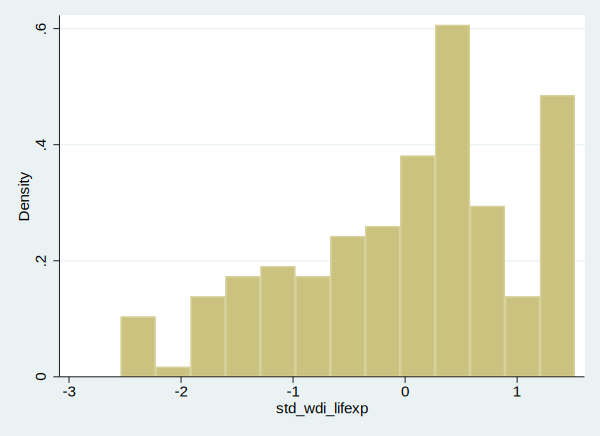

In [9]:
histogram std_wdi_lifexp

## Normalize
When we normalize a variable we first shift the scale so that it starts at 0, and then compress it so that it ends on 1. We do so by first subtracting the minimum value, and then divide by the new maximum value (which is the old max value minus the old min value).

We can do this in one command, if we remember the min value (50.59105) and the max value (83.58781):

In [10]:
gen norm_wdi_lifexp = (wdi_lifexp-50.59105)/(83.58781-50.59105)
sum norm_wdi_lifexp


(9 missing values generated)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
norm_wdi_l~p |        185    .6262154    .2466323  -2.44e-08   .9999999


Again, disregard the rounding errors. The new minimum value is 0, and the new max value is 1. But if we looked at a histogram we would also this time see that the shape of the distribution is unchanged. Only the scale has changed.

## Recap
To do these transformations we neeeded to know four things: The mean, the standard deviation, the min value, and the max value. The formulas to do the transformations are the following. Don't forget the parentheses!

**Center**<br>
`gen newvariable = oldvariable-mean`

**Standardize**<br>
`gen newvariable = (oldvariable-mean)/standarddeviation`

**Normalize**<br>
`gen newvariable = (oldvariable-minvalue)/(maxvalue-minvalue)`